In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

# Load the data
df = pd.read_csv('07 - FAZ_POEMS_REVIEW - Entity_extractions of Exact_search.csv', sep=',')  # Adjust separator if needed

# Clean up column names by stripping whitespace
df.columns = df.columns.str.strip()

print("Cleaned column names:")
for i, col in enumerate(df.columns):
    print(f"{i}: '{col}'")

# Define the correct column names based on your sample
expected_columns = {
    'poem_id': 'poem_id',
    'Row_ID': 'Row_ID', 
    'Title_cleaned': 'Title_cleaned',
    'sentiments': 'sentiments',
    'أماكن': 'أماكن',
    'أحداث': 'أحداث',
    'دين': 'دين',
    'مواضيع': 'مواضيع',
    'البحر': 'البحر',
    'قافية': 'قافية',
    'روي': 'روي',
    'تصنيف': 'تصنيف'
}

# Function to find the actual column names in the dataframe
def find_column(actual_df, expected_name):
    for col in actual_df.columns:
        if expected_name.strip() == col.strip():
            return col
    return None

# Find actual column names
poem_id_col = find_column(df, 'poem_id')
row_id_col = find_column(df, 'Row_ID')
title_col = find_column(df, 'Title_cleaned')
sentiment_col = find_column(df, 'sentiments')
place_col = find_column(df, 'أماكن')
event_col = find_column(df, 'أحداث')
religion_col = find_column(df, 'دين')
topic_col = find_column(df, 'مواضيع')
meter_col = find_column(df, 'البحر')
rhyme_col = find_column(df, 'قافية')
rhythm_col = find_column(df, 'روي')
classification_col = find_column(df, 'تصنيف')

print(f"\nColumn mapping:")
print(f"poem_id: {poem_id_col}")
print(f"Row_ID: {row_id_col}")
print(f"Title_cleaned: {title_col}")
print(f"sentiments: {sentiment_col}")
print(f"أماكن: {place_col}")
print(f"أحداث: {event_col}")
print(f"دين: {religion_col}")
print(f"مواضيع: {topic_col}")
print(f"البحر: {meter_col}")
print(f"قافية: {rhyme_col}")
print(f"روي: {rhythm_col}")
print(f"تصنيف: {classification_col}")

# Analysis function with error handling
def analyze_column_distribution(df, col_name, display_name):
    """Analyze distribution of a categorical column"""
    actual_col = find_column(df, col_name)
    if actual_col and actual_col in df.columns:
        print(f"\n{display_name} Distribution:")
        value_counts = df[actual_col].value_counts(dropna=False)
        print(value_counts.head(10))
        return value_counts
    else:
        print(f"\nColumn '{col_name}' not found in the dataset")
        return pd.Series(dtype='object')

# Perform analysis
if poem_id_col:
    # Group by poem_id to see poem-level statistics
    poem_stats = df.groupby(poem_id_col).agg({
        row_id_col if row_id_col else df.columns[1]: 'count',  # Use Row_ID or fallback to second column
        title_col if title_col else df.columns[5]: 'first',    # Use Title_cleaned or fallback to sixth column
        poem_id_col: 'first'
    }).rename(columns={row_id_col if row_id_col else df.columns[1]: 'line_count'})
    
    print(f"\nPoem line counts:\nMin: {poem_stats['line_count'].min()}\nMax: {poem_stats['line_count'].max()}\nMean: {poem_stats['line_count'].mean():.2f}")
else:
    print("poem_id column not found - cannot group by poem")

# Analyze various columns
analyze_column_distribution(df, 'sentiments', 'Sentiments')
analyze_column_distribution(df, 'أماكن', 'Places (أماكن)')
analyze_column_distribution(df, 'أحداث', 'Events (أحداث)')
analyze_column_distribution(df, 'دين', 'Religious Content (دين)')
analyze_column_distribution(df, 'مواضيع', 'Topics (مواضيع)')
analyze_column_distribution(df, 'البحر', 'Poetic Meter (البحر)')
analyze_column_distribution(df, 'قافية', 'Rhyme (قافية)')
analyze_column_distribution(df, 'روي', 'Rhythm (روي)')
analyze_column_distribution(df, 'تصنيف', 'Classification (تصنيف)')

# Sentiment analysis summary (if column exists)
actual_sentiment_col = find_column(df, 'sentiments')
if actual_sentiment_col and actual_sentiment_col in df.columns:
    print("\nDetailed Sentiment Analysis:")
    all_sentiments = []
    for sent in df[actual_sentiment_col].dropna():
        if isinstance(sent, str):
            # Handle multiple sentiments in one cell
            multi_sents = [s.strip() for s in str(sent).split(',')]
            all_sentiments.extend([s for s in multi_sents if s])  # Remove empty strings
    
    if all_sentiments:
        sentiment_freq = Counter(all_sentiments)
        print("Top 15 sentiments:", dict(sentiment_freq.most_common(15)))

# Summary report
print("\n" + "="*60)
print("SUMMARY REPORT")
print("="*60)
if poem_id_col:
    print(f"Total poems: {df[poem_id_col].nunique()}")
print(f"Total lines: {len(df)}")
if poem_id_col and row_id_col:
    print(f"Average lines per poem: {len(df)/df[poem_id_col].nunique():.2f}" if poem_id_col in df.columns else "Cannot calculate - no poem_id")
actual_classification_col = find_column(df, 'تصنيف')
if actual_classification_col:
    print(f"Poem classifications: {df[actual_classification_col].nunique()} types")
actual_sentiment_col = find_column(df, 'sentiments')
if actual_sentiment_col:
    print(f"Unique sentiments: {df[actual_sentiment_col].nunique()}")
actual_meter_col = find_column(df, 'البحر')
if actual_meter_col:
    print(f"Poetic meters (البحر): {df[actual_meter_col].nunique()}")

Cleaned column names:
0: 'poem_id'
1: 'Row_ID'
2: 'Title_raw'
3: 'Poem_line_raw'
4: 'summary'
5: 'Title_cleaned'
6: 'Poem_line_cleaned'
7: 'قافية'
8: 'روي'
9: 'البحر'
10: 'وصل'
11: 'حركة'
12: 'شخص'
13: 'sentiments'
14: 'أماكن'
15: 'أحداث'
16: 'دين'
17: 'مواضيع'
18: 'تصنيف'

Column mapping:
poem_id: poem_id
Row_ID: Row_ID
Title_cleaned: Title_cleaned
sentiments: sentiments
أماكن: أماكن
أحداث: أحداث
دين: دين
مواضيع: مواضيع
البحر: البحر
قافية: قافية
روي: روي
تصنيف: تصنيف

Poem line counts:
Min: 2
Max: 103
Mean: 11.97

Sentiments Distribution:
sentiments
حب      1025
فخر      833
NaN      637
حزن      508
شوق      284
حكمة     241
أمل      165
غضب      114
صبر      101
فرح       93
Name: count, dtype: int64

Places (أماكن) Distribution:
أماكن
NaN                               3202
name:الأرض,type:أراضي_إماراتية      47
name:الوطن,type:أراضي_إماراتية      27
name:دبي,type:أراضي_إماراتية        22
name:البحر,type:طبيعة_عامة          20
name:الدرب,type:أماكن_مجردة         18
name:الزمان,type:

Note: you may need to restart the kernel to use updated packages.


C:\Users\h.ibrahim\AppData\Local\Temp\ipykernel_12128\2274293599.py:127: UserWarning: Glyph 65010 (\N{ARABIC LIGATURE ALLAH ISOLATED FORM}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
f:\Anaconda\envs\cudas\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 65010 (\N{ARABIC LIGATURE ALLAH ISOLATED FORM}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


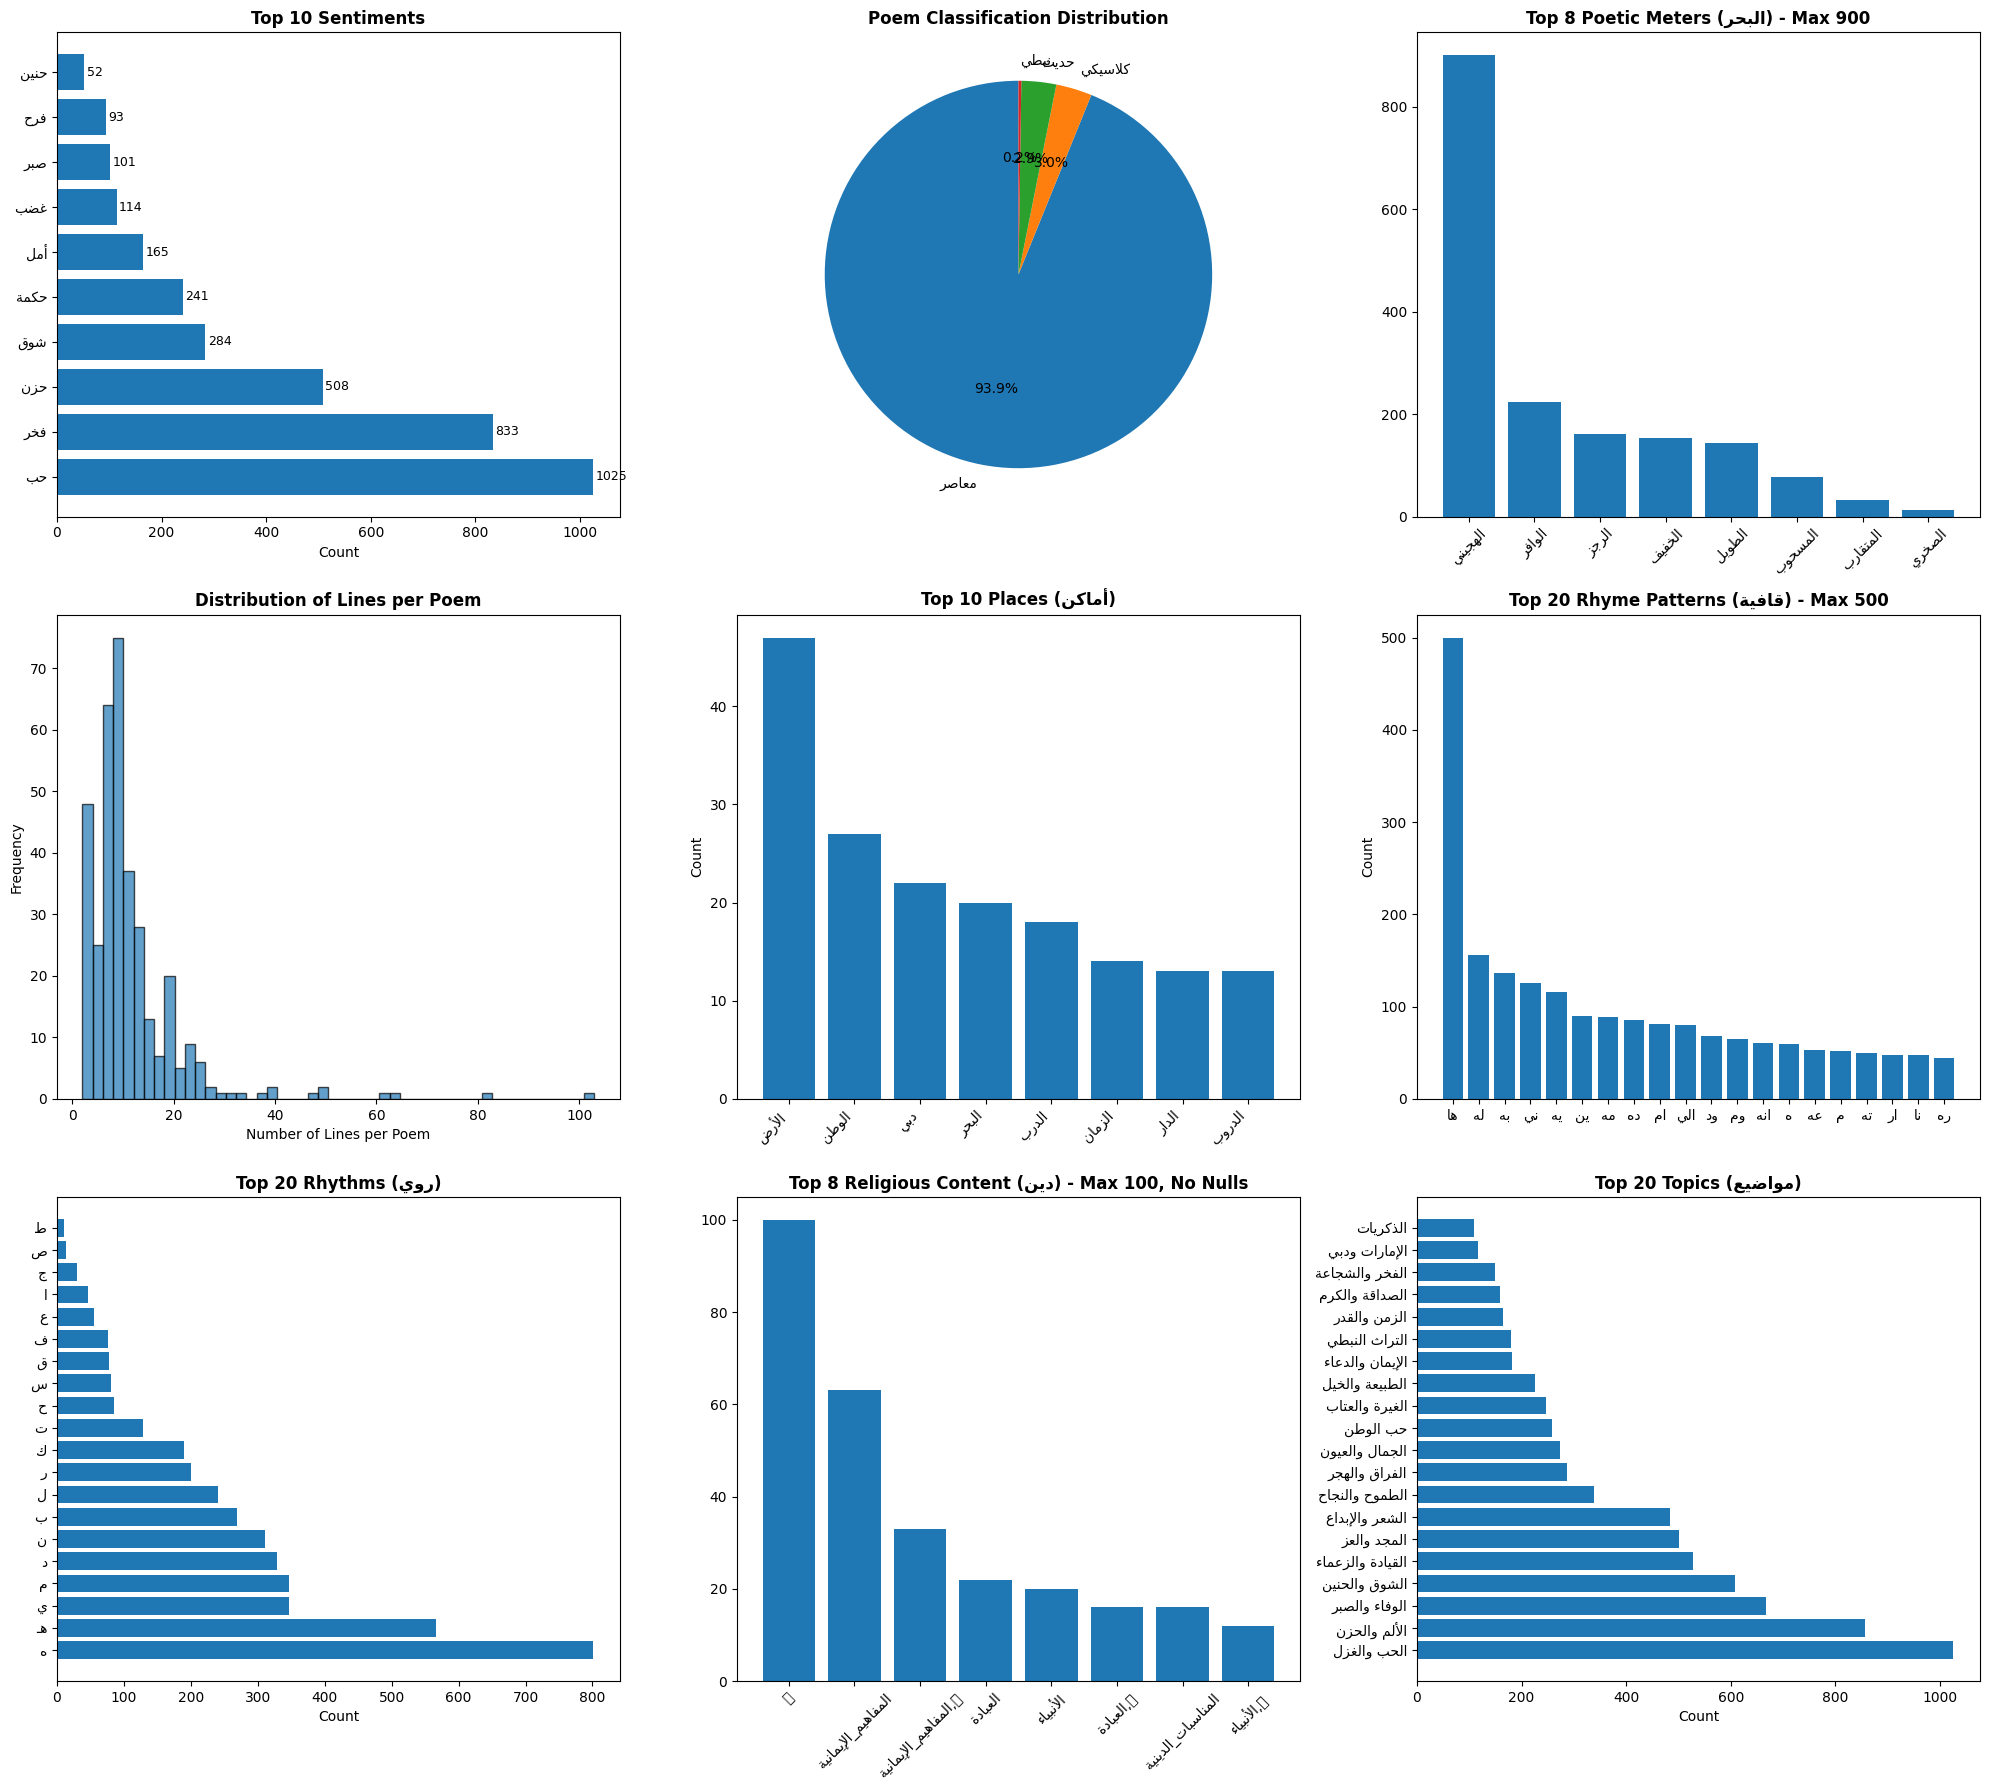

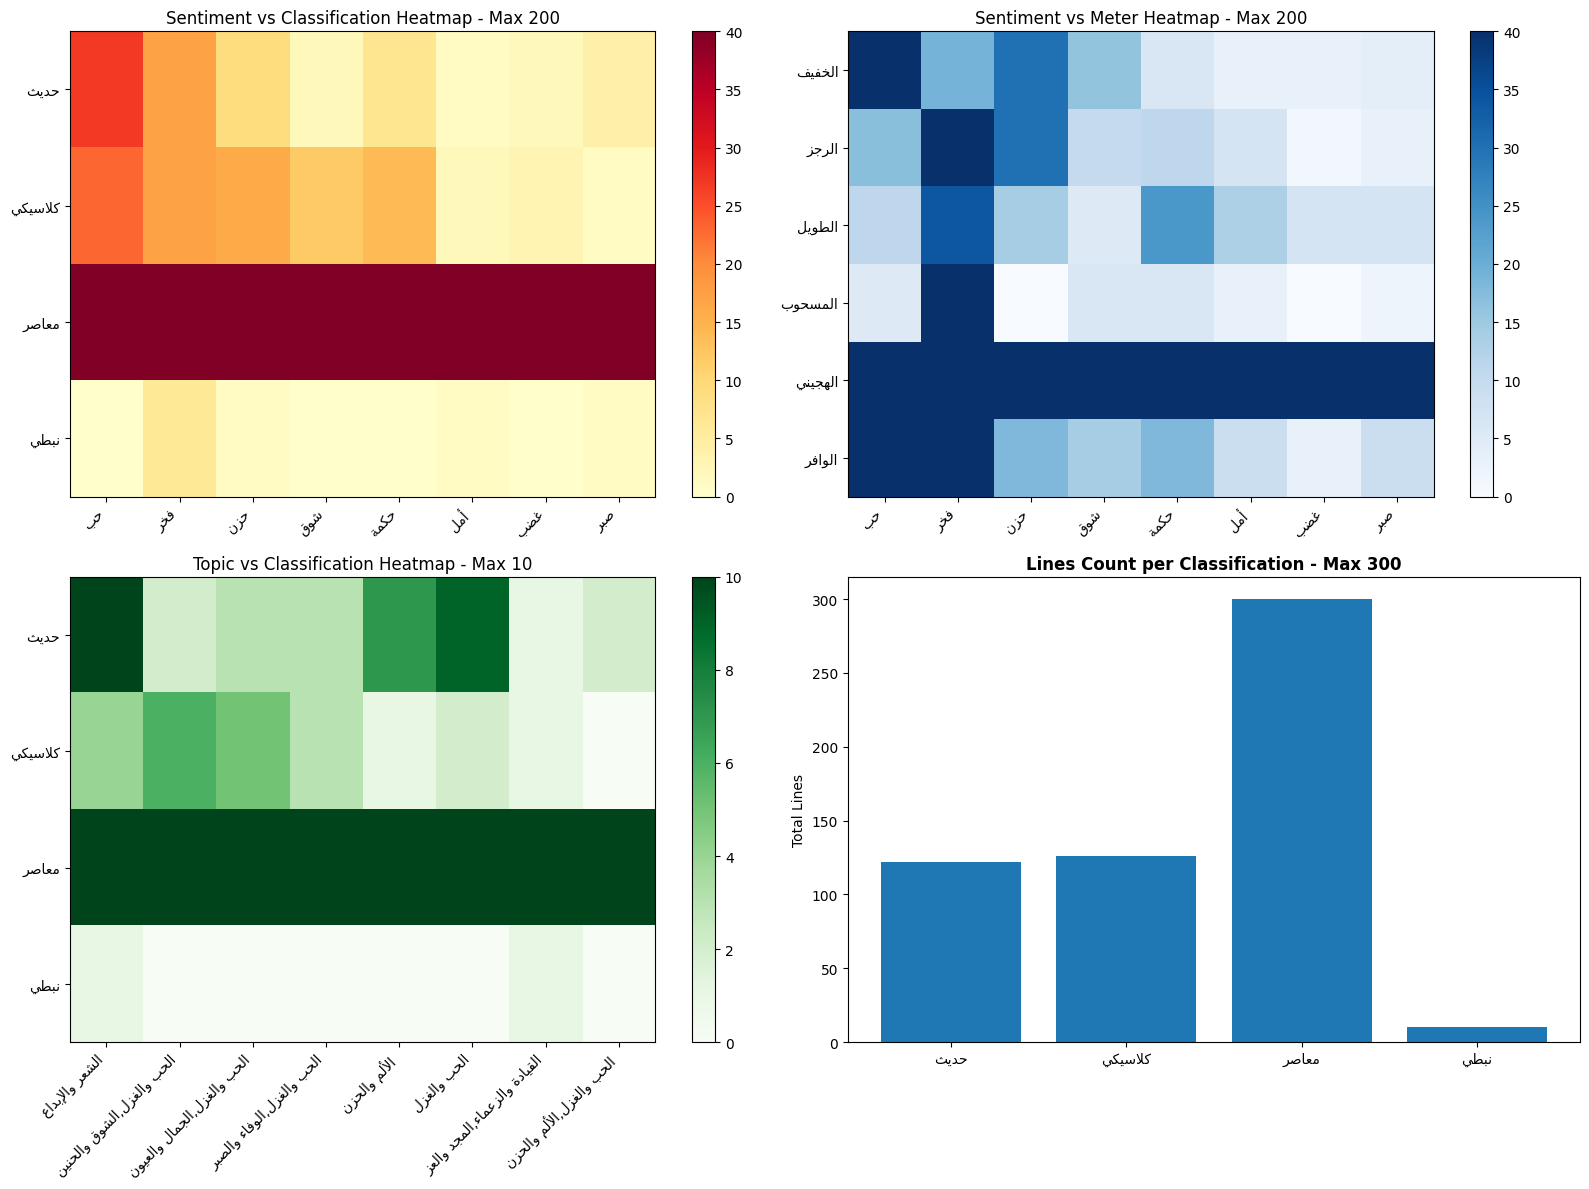

C:\Users\h.ibrahim\AppData\Local\Temp\ipykernel_12128\2274293599.py:233: UserWarning: Glyph 65010 (\N{ARABIC LIGATURE ALLAH ISOLATED FORM}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
f:\Anaconda\envs\cudas\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 65010 (\N{ARABIC LIGATURE ALLAH ISOLATED FORM}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


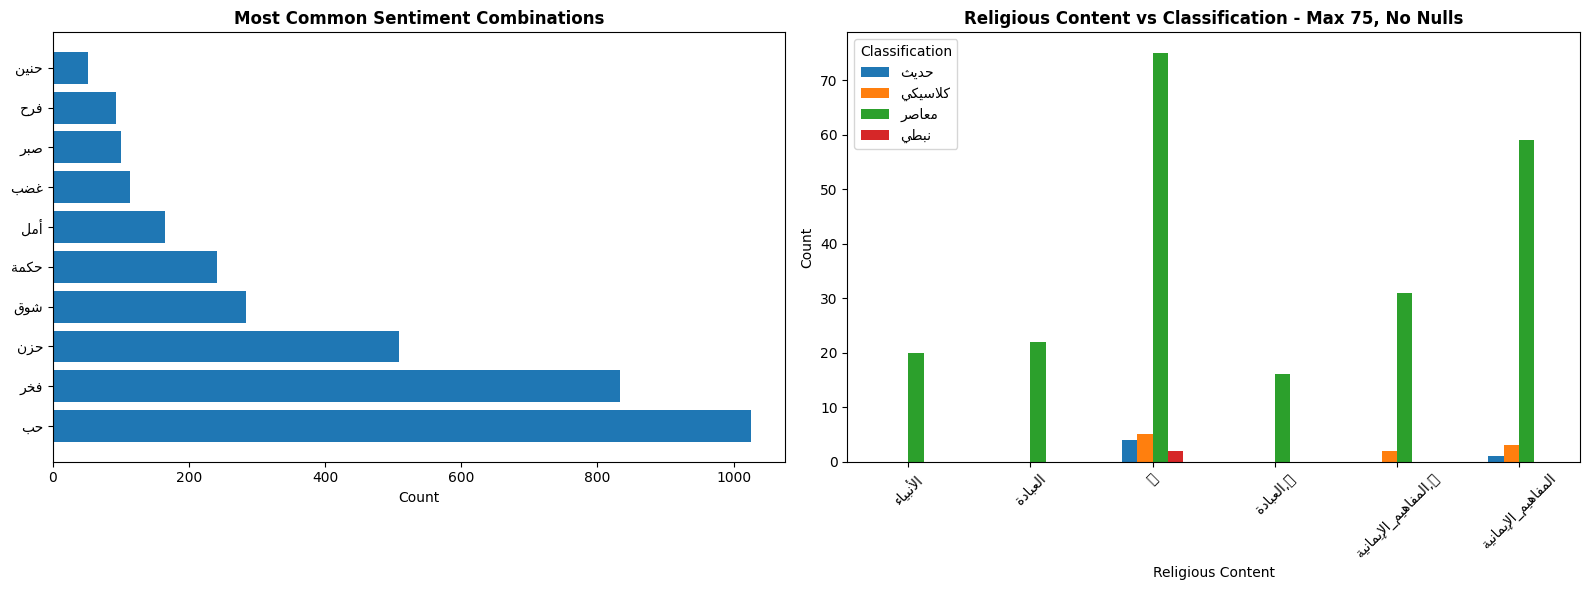


Summary Statistics Table:
           Metric       Value
      Total Poems         352
      Total Lines        4213
   Avg Lines/Poem       11.97
Unique Sentiments          40
    Unique Meters          10
  Classifications           4
  Avg Poem Length 12.0 ± 10.4


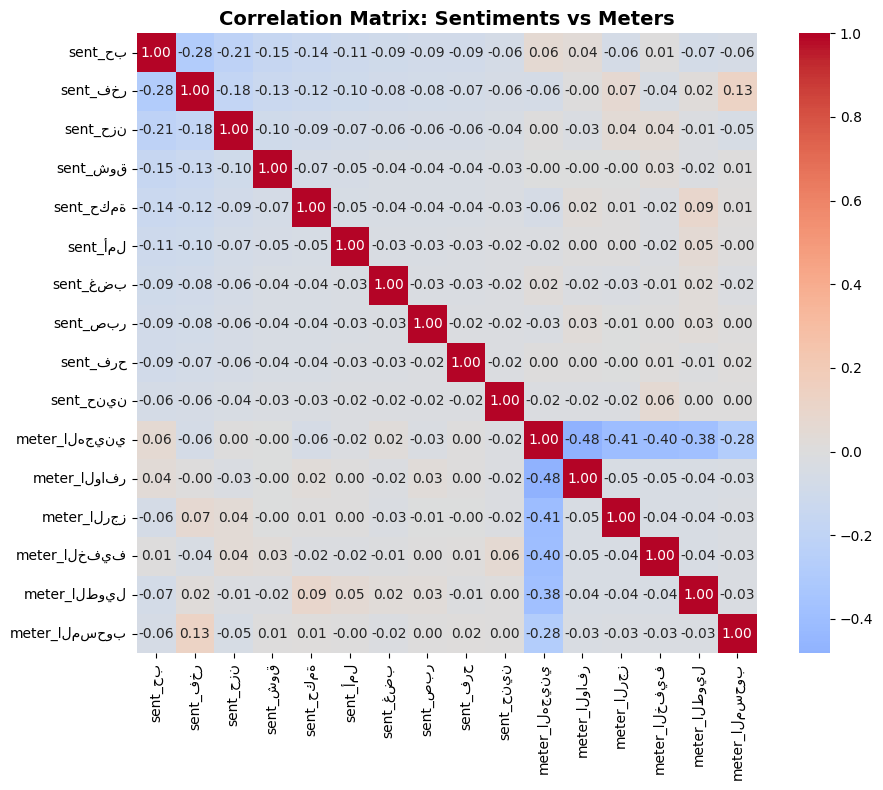

In [20]:
%pip install arabic-reshaper python-bidi seaborn
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from collections import Counter
import arabic_reshaper
from bidi.algorithm import get_display

# Function to properly display Arabic text
def display_arabic(text):
    if pd.isna(text):
        return ""
    reshaped_text = arabic_reshaper.reshape(str(text))
    return get_display(reshaped_text)

# Set a font that supports Arabic characters
plt.rcParams['font.family'] = 'DejaVu Sans'

# Create comprehensive visualizations
fig, axes = plt.subplots(3, 3, figsize=(20, 18))

# 1. Top Sentiments
sentiment_counts = df['sentiments'].value_counts().dropna().head(10)
axes[0,0].barh(range(len(sentiment_counts)), sentiment_counts.values)
axes[0,0].set_yticks(range(len(sentiment_counts)))
arabic_sentiment_labels = [display_arabic(sent) for sent in sentiment_counts.index]
axes[0,0].set_yticklabels(arabic_sentiment_labels, fontsize=10)
axes[0,0].set_xlabel('Count')
title_text = display_arabic('Top 10 Sentiments')
axes[0,0].set_title(title_text, fontsize=12, fontweight='bold')
for i, v in enumerate(sentiment_counts.values):
    axes[0,0].text(v + 5, i, str(v), va='center', fontsize=9)

# 2. Poem Classification Distribution
class_counts = df['تصنيف'].value_counts()
arabic_class_labels = [display_arabic(cls) for cls in class_counts.index]
axes[0,1].pie(class_counts.values, labels=arabic_class_labels, autopct='%1.1f%%', startangle=90)
title_text = display_arabic('Poem Classification Distribution')
axes[0,1].set_title(title_text, fontsize=12, fontweight='bold')

# 3. Poetic Meters Distribution (max 300)
meter_counts = df['البحر'].value_counts().head(8)
capped_meter_values = [min(val, 900) for val in meter_counts.values]
arabic_meter_labels = [display_arabic(meter) for meter in meter_counts.index]
axes[0,2].bar(arabic_meter_labels, capped_meter_values)
title_text = display_arabic('Top 8 Poetic Meters (البحر) - Max 900')
axes[0,2].set_title(title_text, fontsize=12, fontweight='bold')
axes[0,2].tick_params(axis='x', rotation=45)

# 4. Line Count Distribution per Poem
line_counts = df.groupby('poem_id')['Row_ID'].count()
axes[1,0].hist(line_counts.values, bins=50, edgecolor='black', alpha=0.7)
axes[1,0].set_xlabel('Number of Lines per Poem')
axes[1,0].set_ylabel('Frequency')
title_text = display_arabic('Distribution of Lines per Poem')
axes[1,0].set_title(title_text, fontsize=12, fontweight='bold')

# 5. Top Places
place_counts = df['أماكن'].value_counts().dropna().head(8)
place_names = []
for place in place_counts.index:
    if 'name:' in str(place):
        name_part = str(place).split('name:')[1].split(',')[0]
        place_names.append(name_part)
    else:
        place_names.append(str(place)[:15])

arabic_place_labels = [display_arabic(name) for name in place_names]
axes[1,1].bar(range(len(place_counts)), place_counts.values)
axes[1,1].set_xticks(range(len(place_counts)))
axes[1,1].set_xticklabels(arabic_place_labels, rotation=45, ha='right')
title_text = display_arabic('Top 10 Places (أماكن)')
axes[1,1].set_title(title_text, fontsize=12, fontweight='bold')
axes[1,1].set_ylabel('Count')

# 6. Rhyme Pattern Distribution (max 200)
rhyme_counts = df['قافية'].value_counts().head(20)
capped_rhyme_values = [min(val, 500) for val in rhyme_counts.values]
arabic_rhyme_labels = [display_arabic(rhyme) for rhyme in rhyme_counts.index]
axes[1,2].bar(arabic_rhyme_labels, capped_rhyme_values)
title_text = display_arabic('Top 20 Rhyme Patterns (قافية) - Max 500')
axes[1,2].set_title(title_text, fontsize=12, fontweight='bold')
axes[1,2].set_ylabel('Count')

# 7. Rhythm Distribution
rhythm_counts = df['روي'].value_counts().head(20)
arabic_rhythm_labels = [display_arabic(rhythm) for rhythm in rhythm_counts.index]
axes[2,0].barh(arabic_rhythm_labels, rhythm_counts.values)
title_text = display_arabic('Top 20 Rhythms (روي)')
axes[2,0].set_title(title_text, fontsize=12, fontweight='bold')
axes[2,0].set_xlabel('Count')

# 8. Religious Content Distribution (max 75, exclude null/[])
religion_counts = df['دين'].value_counts()
religion_counts = religion_counts[religion_counts.index != 'NaN']
religion_counts = religion_counts[religion_counts.index != '']
religion_counts = religion_counts[religion_counts.index != 'nan']
religion_counts = religion_counts.head(8)

capped_religion_values = [min(val, 100) for val in religion_counts.values]
arabic_religion_labels = [display_arabic(rel) for rel in religion_counts.index]
axes[2,1].bar(arabic_religion_labels, capped_religion_values)
title_text = display_arabic('Top 8 Religious Content (دين) - Max 100, No Nulls')
axes[2,1].set_title(title_text, fontsize=12, fontweight='bold')
axes[2,1].tick_params(axis='x', rotation=45)

# 9. Topic Distribution - Split comma-separated topics
# Split topics by comma and create a new series with individual topics
all_topics = []
for topic_str in df['مواضيع'].dropna():
    if isinstance(topic_str, str):
        topics = [t.strip() for t in topic_str.split(',')]
        all_topics.extend(topics)
    else:
        all_topics.append(topic_str)

# Count individual topics
topic_series = pd.Series(all_topics)
topic_counts = topic_series.value_counts().head(20)
arabic_topic_labels = [display_arabic(topic) for topic in topic_counts.index]
axes[2,2].barh(arabic_topic_labels, topic_counts.values)
title_text = display_arabic('Top 20 Topics (مواضيع)')
axes[2,2].set_title(title_text, fontsize=12, fontweight='bold')
axes[2,2].set_xlabel('Count')

plt.tight_layout()
plt.show()

# Additional Advanced Visualizations
fig2, axes2 = plt.subplots(2, 2, figsize=(16, 12))

# ABR Chart 1: Sentiment vs Classification (max 200)
pivot_sentiment_class = df.groupby(['sentiments', 'تصنيف']).size().unstack(fill_value=0)
top_sentiments = df['sentiments'].value_counts().head(8).index
pivot_filtered = pivot_sentiment_class.loc[top_sentiments]

capped_pivot_sc = pivot_filtered.clip(upper=40)
im1 = axes2[0,0].imshow(capped_pivot_sc.T, cmap='YlOrRd', aspect='auto', interpolation='nearest')
arabic_sentiment_labels = [display_arabic(sent) for sent in pivot_filtered.index]
arabic_class_labels = [display_arabic(cls) for cls in pivot_filtered.columns]

axes2[0,0].set_xticks(range(len(pivot_filtered.index)))
axes2[0,0].set_xticklabels(arabic_sentiment_labels, rotation=45, ha='right')
axes2[0,0].set_yticks(range(len(pivot_filtered.columns)))
axes2[0,0].set_yticklabels(arabic_class_labels)
title_text = display_arabic('Sentiment vs Classification Heatmap - Max 200')
axes2[0,0].set_title(title_text)
plt.colorbar(im1, ax=axes2[0,0])

# ABR Chart 2: Meter vs Sentiment (max 200)
top_meters = df['البحر'].value_counts().head(6).index
df_meter_sentiment = df[df['البحر'].isin(top_meters)]
pivot_meter_sentiment = df_meter_sentiment.groupby(['sentiments', 'البحر']).size().unstack(fill_value=0)
top_sentiments_2 = df_meter_sentiment['sentiments'].value_counts().head(8).index
pivot_ms = pivot_meter_sentiment.loc[top_sentiments_2]

capped_pivot_ms = pivot_ms.clip(upper=40)
im2 = axes2[0,1].imshow(capped_pivot_ms.T, cmap='Blues', aspect='auto', interpolation='nearest')
arabic_sentiment_labels_2 = [display_arabic(sent) for sent in pivot_ms.index]
arabic_meter_labels_2 = [display_arabic(meter) for meter in pivot_ms.columns]

axes2[0,1].set_xticks(range(len(pivot_ms.index)))
axes2[0,1].set_xticklabels(arabic_sentiment_labels_2, rotation=45, ha='right')
axes2[0,1].set_yticks(range(len(pivot_ms.columns)))
axes2[0,1].set_yticklabels(arabic_meter_labels_2)
title_text = display_arabic('Sentiment vs Meter Heatmap - Max 200')
axes2[0,1].set_title(title_text)
plt.colorbar(im2, ax=axes2[0,1])

# ABR Chart 3: Topic vs Classification (max 30)
df_topic_class = df.groupby(['مواضيع', 'تصنيف']).size().unstack(fill_value=0)
top_topics = df['مواضيع'].value_counts().head(8).index
pivot_tc = df_topic_class.loc[top_topics]

capped_pivot_tc = pivot_tc.clip(upper=10)
im3 = axes2[1,0].imshow(capped_pivot_tc.T, cmap='Greens', aspect='auto', interpolation='nearest')
arabic_topic_labels_2 = [display_arabic(topic) for topic in pivot_tc.index]
arabic_class_labels_2 = [display_arabic(cls) for cls in pivot_tc.columns]

axes2[1,0].set_xticks(range(len(pivot_tc.index)))
axes2[1,0].set_xticklabels(arabic_topic_labels_2, rotation=45, ha='right')
axes2[1,0].set_yticks(range(len(pivot_tc.columns)))
axes2[1,0].set_yticklabels(arabic_class_labels_2)
title_text = display_arabic('Topic vs Classification Heatmap - Max 10')
axes2[1,0].set_title(title_text)
plt.colorbar(im3, ax=axes2[1,0])

# ABR Chart 4: Lines per Classification (max 200)
avg_lines_per_class = df.groupby('تصنيف').size()
capped_lines_values = [min(val, 300) for val in avg_lines_per_class.values]
arabic_class_labels_3 = [display_arabic(cls) for cls in avg_lines_per_class.index]
axes2[1,1].bar(arabic_class_labels_3, capped_lines_values)
title_text = display_arabic('Lines Count per Classification - Max 300')
axes2[1,1].set_title(title_text, fontsize=12, fontweight='bold')
axes2[1,1].set_ylabel('Total Lines')

plt.tight_layout()
plt.show()

# Create sentiment trend analysis by poem line position
fig3, axes3 = plt.subplots(1, 2, figsize=(16, 6))

# Most common sentiment combinations
sentiment_combinations = df['sentiments'].value_counts().head(10)
arabic_sent_comb_labels = [display_arabic(sent) for sent in sentiment_combinations.index]
axes3[0].barh(arabic_sent_comb_labels, sentiment_combinations.values)
title_text = display_arabic('Most Common Sentiment Combinations')
axes3[0].set_title(title_text, fontsize=12, fontweight='bold')
axes3[0].set_xlabel('Count')

# Religious content vs other categories (max 75, exclude null/[])
religion_vs_class = df[df['دين'].notna() & (df['دين'] != '') & (df['دين'] != 'NaN') & (df['دين'] != 'nan')]
religion_vs_class_grouped = religion_vs_class.groupby(['دين', 'تصنيف']).size().unstack(fill_value=0)
top_religion = religion_vs_class['دين'].value_counts().head(6).index
religion_pivot = religion_vs_class_grouped.loc[religion_vs_class_grouped.index.isin(top_religion)]

capped_religion_pivot = religion_pivot.clip(upper=75)
arabic_religion_labels_2 = [display_arabic(rel) for rel in religion_pivot.index]
capped_religion_pivot.index = arabic_religion_labels_2

# Create the plot with Arabic labels
ax = capped_religion_pivot.plot(kind='bar', ax=axes3[1])
arabic_class_labels_4 = [display_arabic(cls) for cls in capped_religion_pivot.columns]
ax.legend(arabic_class_labels_4, title=display_arabic('Classification'))

title_text = display_arabic('Religious Content vs Classification - Max 75, No Nulls')
ax.set_title(title_text, fontsize=12, fontweight='bold')
ax.set_xlabel(display_arabic('Religious Content'))
ax.set_ylabel('Count')
ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Summary statistics table as a visualization
stats_data = {
    'Metric': [
        'Total Poems',
        'Total Lines', 
        'Avg Lines/Poem',
        'Unique Sentiments',
        'Unique Meters',
        'Classifications',
        'Avg Poem Length'
    ],
    'Value': [
        df['poem_id'].nunique(),
        len(df),
        round(len(df)/df['poem_id'].nunique(), 2),
        df['sentiments'].nunique(),
        df['البحر'].nunique(),
        df['تصنيف'].nunique(),
        f"{line_counts.mean():.1f} ± {line_counts.std():.1f}"
    ]
}

stats_df = pd.DataFrame(stats_data)
print("\nSummary Statistics Table:")
print(stats_df.to_string(index=False))

# Create a correlation heatmap for numerical relationships
fig4, ax = plt.subplots(figsize=(10, 8))
top_sentiments = df['sentiments'].value_counts().head(10).index
top_meters = df['البحر'].value_counts().head(6).index

for sent in top_sentiments:
    df[f'sent_{sent}'] = df['sentiments'].apply(lambda x: 1 if x == sent else 0)

for meter in top_meters:
    df[f'meter_{meter}'] = df['البحر'].apply(lambda x: 1 if x == meter else 0)

binary_cols = [col for col in df.columns if col.startswith(('sent_', 'meter_'))]
if len(binary_cols) > 1:
    corr_matrix = df[binary_cols].corr()
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, 
                square=True, fmt='.2f', ax=ax)
    title_text = display_arabic('Correlation Matrix: Sentiments vs Meters')
    ax.set_title(title_text, fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

# Clean up temporary columns
cols_to_drop = [col for col in df.columns if col.startswith(('sent_', 'meter_'))]
df = df.drop(columns=cols_to_drop, errors='ignore')

=== PERSON ENTITY ANALYSIS ===
Total entities extracted: 4429

1. MOST FREQUENT NAMES:
name
الشاعر                            1348
الحبيب                             860
الحبيبة                            759
محمد بن راشد آل مكتوم              243
الله                               172
محمد بن زايد آل نهيان              131
زايد بن سلطان آل نهيان             116
حمدان بن محمد بن راشد آل مكتوم     115
القلب                               46
العين                               39
اعمار                               26
citizens                            24
خليفه بن زايد آل نهيان              17
النبي محمد                          15
مريم                                14
Name: count, dtype: int64

2. MOST FREQUENT RELATIONS:
relation
المتحدث               1343
المحبوب                867
المحبوبة               760
الأب                   247
رب                     156
رئيس الدولة            131
المؤسس                 117
الذات                  115
عضو                    106
الحبيبة         

C:\Users\h.ibrahim\AppData\Local\Temp\ipykernel_12128\3974827583.py:142: UserWarning: Glyph 65010 (\N{ARABIC LIGATURE ALLAH ISOLATED FORM}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
f:\Anaconda\envs\cudas\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 65010 (\N{ARABIC LIGATURE ALLAH ISOLATED FORM}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


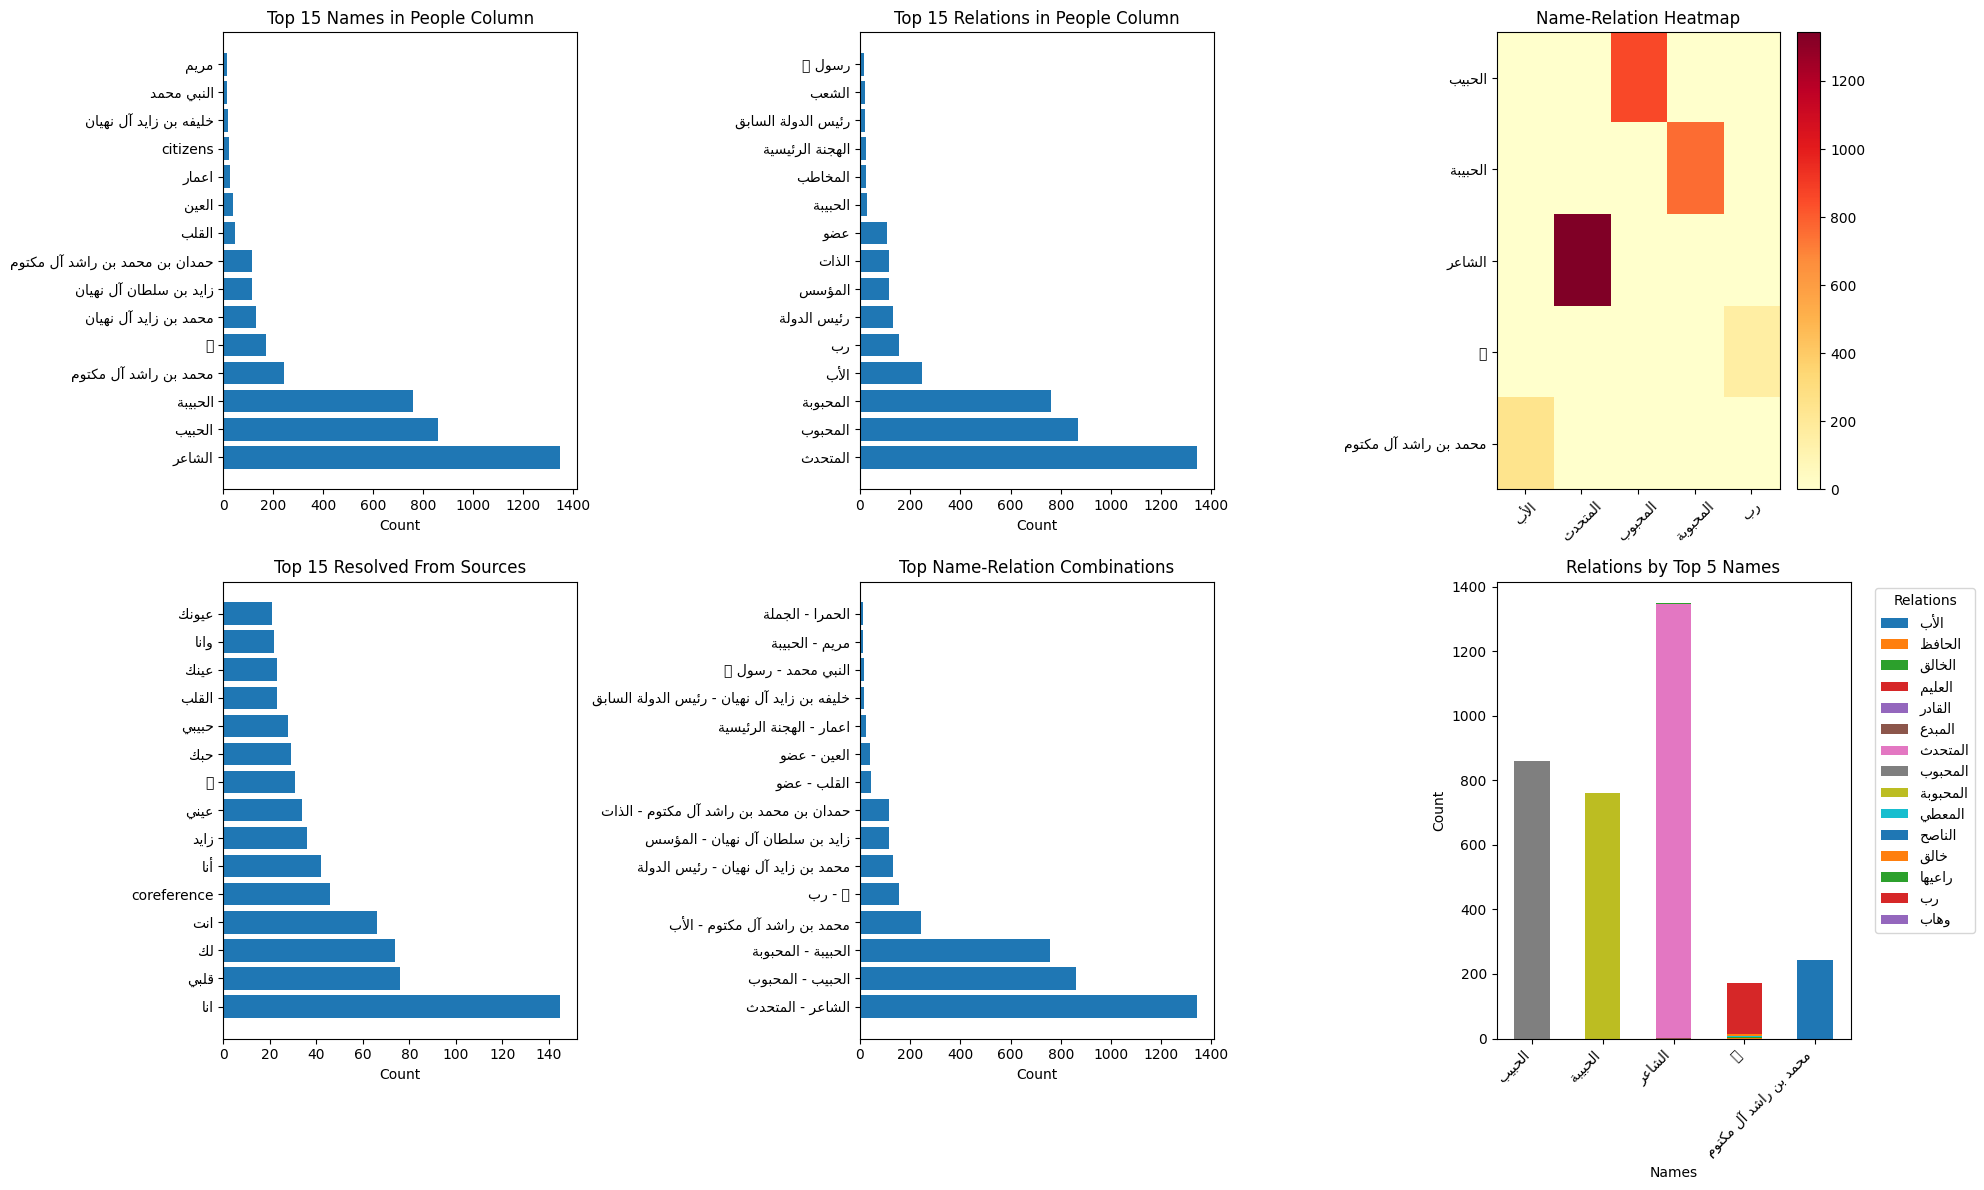


=== DETAILED ENTITY BREAKDOWN ===

5. ENTITY PATTERNS ANALYSIS:
Average entities per entry: 1.30
Max entities per entry: 4
Entries with multiple entities: 998

Total unique names: 272
Total unique relations: 227

Unique names (first 20): ['ﺔﺒﻴﺒﺤﻟﺍ', 'ﺮﻋﺎﺸﻟﺍ', 'ﺐﻴﺒﺤﻟﺍ', 'ﻥﺎﻴﻬﻧ ﻝﺁ ﻥﺎﻄﻠﺳ ﻦﺑ ﺪﻳﺍﺯ', 'ﻥﺎﺴﻧﻻﺍ', 'ﺏﻮﻠﻘﻟﺍ', 'ﺱﺎﻨﻟﺍ', 'ﺭﺎﺠﺘﻟﺍ', 'ﻦﻳﺪﻟﺎﺨﻟﺍ', 'ﺮﺠﻬﻟﺍ', 'ﷲ', 'ﺐﻠﻘﻟﺍ', 'ﻥﺎﻴﻬﻧ ﻝﺁ ﺪﻳﺍﺯ ﻦﺑ ﻪﻔﻴﻠﺧ', 'ﻥﺎﻄﻠﺳ ﻮﺑﺍ', 'ﻡﻮﺘﻜﻣ ﻝﺁ ﺪﺷﺍﺭ ﻦﺑ ﺪﻤﺤﻣ', 'ﻦﻳﺪﻟﺍ ﺡﻼﺻ', 'ﻥﺎﻴﻬﻧ ﻝﺁ ﺪﻳﺍﺯ ﻦﺑ ﺪﻤﺤﻣ', 'ﻡﻮﺘﻜﻣ ﻝﺁ ﺪﺷﺍﺭ ﻦﺑ ﺪﻤﺤﻣ ﻦﺑ ﻥﺍﺪﻤﺣ', 'ﺏﺮﻌﻟﺍ', 'ﺪﺨﻟﺍ']

Unique relations (first 20): ['ﺔﺑﻮﺒﺤﻤﻟﺍ', 'ﺙﺪﺤﺘﻤﻟﺍ', 'ﺏﻮﺒﺤﻤﻟﺍ', 'ﺲﺳﺆﻤﻟﺍ', 'ﻡﺎﻌﻟﺍ ﻥﺎﺴﻧﻹﺍ', 'ﺔﻠﻴﺒﻨﻟﺍ ﺏﻮﻠﻘﻟﺍ', 'ﺔﻣﺎﻌﻟﺍ ﺱﺎﻨﻟﺍ', 'ﺭﺎﺠﺘﻟﺍ', 'ﻥﻭﺪﻟﺎﺨﻟﺍ', 'ﻢﺼﺨﻟﺍ', 'ﺏﺭ', 'ﻮﻀﻋ', 'ﻖﺑﺎﺴﻟﺍ ﺔﻟﻭﺪﻟﺍ ﺲﻴﺋﺭ', 'ﺪﺋﺎﻗ', 'ﺏﻷﺍ', 'ﻲﺨﻳﺭﺎﺗ ﺪﺋﺎﻗ', 'ﺔﻟﻭﺪﻟﺍ ﺲﻴﺋﺭ', 'ﺕﺍﺬﻟﺍ', 'ﺐﻌﺸﻟﺍ', 'ﷲ ﻝﻮﺳﺭ']

6. MOST COMPLEX ENTRIES (Multiple resolved_from sources):
Name: ﺐﻴﺒﺤﻟﺍ, Relation: ﺏﻮﺒﺤﻤﻟﺍ, Resolved from 7 sources: ['وصلك', 'اموت', 'برد', 'قيض', 'لَك', 'سبه', 'ريها']
Name: ﺔﺒﻴﺒﺤﻟﺍ, Relation: ﺔﺑﻮﺒﺤﻤﻟﺍ, Resolve

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from collections import Counter, defaultdict
import arabic_reshaper
from bidi.algorithm import get_display

def display_arabic(text):
    if pd.isna(text):
        return ""
    reshaped_text = arabic_reshaper.reshape(str(text))
    return get_display(reshaped_text)

# Extract entities from the person column
def extract_person_entities(person_text):
    if pd.isna(person_text) or person_text == '':
        return []
    
    # Find all person entities using regex pattern
    pattern = r'\[name:([^,]+),relation:([^,]+),resolved_from:([^\]]+)\]'
    matches = re.findall(pattern, person_text)
    
    entities = []
    for match in matches:
        name = match[0].strip()
        relation = match[1].strip()
        resolved_from = match[2].strip()
        
        # Split resolved_from by comma if multiple sources
        resolved_sources = [src.strip() for src in resolved_from.split(',')]
        
        entities.append({
            'name': name,
            'relation': relation,
            'resolved_from': resolved_sources
        })
    
    return entities

# Extract all entities from the person column
all_entities = []
df_filtered = df[df['شخص'].notna() & (df['شخص'] != '') & (df['شخص'] != '[]') & (df['شخص'] != 'NaN')]
for person_text in df_filtered['شخص'].dropna():
    entities = extract_person_entities(person_text)
    all_entities.extend(entities)

# Convert to DataFrame for analysis
entities_df = pd.DataFrame(all_entities)
df_filtered = df[df['شخص'].notna() & (df['شخص'] != '') & (df['شخص'] != '[]') & (df['شخص'] != 'NaN')]

if not entities_df.empty:
    print("=== PERSON ENTITY ANALYSIS ===")
    print(f"Total entities extracted: {len(entities_df)}")
    
    # 1. Name Analysis
    print("\n1. MOST FREQUENT NAMES:")
    name_counts = entities_df['name'].value_counts()
    print(name_counts.head(15))
    
    # 2. Relation Analysis
    print("\n2. MOST FREQUENT RELATIONS:")
    relation_counts = entities_df['relation'].value_counts()
    print(relation_counts.head(15))
    
    # 3. Name-Relation Matrix
    print("\n3. NAME-RELATION MATRIX:")
    name_relation_matrix = entities_df.groupby(['name', 'relation']).size().unstack(fill_value=0)
    print(name_relation_matrix)
    
    # 4. Resolved From Analysis
    print("\n4. RESOLVED FROM SOURCES ANALYSIS:")
    all_resolved_sources = []
    for sources_list in entities_df['resolved_from']:
        all_resolved_sources.extend(sources_list)
    
    resolved_counts = Counter(all_resolved_sources)
    print("Top resolved sources:", dict(resolved_counts.most_common(20)))
    
    # Detailed charts
    fig, axes = plt.subplots(2, 3, figsize=(20, 12))
    
    # Chart 1: Top Names
    top_names = name_counts.head(15)
    axes[0,0].barh([display_arabic(name) for name in top_names.index], top_names.values)
    axes[0,0].set_title(display_arabic('Top 15 Names in People Column'))
    axes[0,0].set_xlabel('Count')
    
    # Chart 2: Top Relations
    top_relations = relation_counts.head(15)
    axes[0,1].barh([display_arabic(rel) for rel in top_relations.index], top_relations.values)
    axes[0,1].set_title(display_arabic('Top 15 Relations in People Column'))
    axes[0,1].set_xlabel('Count')
    
    # Chart 3: Name-Relation Heatmap
    if len(name_relation_matrix) > 0 and len(name_relation_matrix.columns) > 0:
        top_names_5 = name_counts.head(5).index
        top_relations_5 = relation_counts.head(5).index
        subset_matrix = name_relation_matrix.loc[
            name_relation_matrix.index.intersection(top_names_5),
            name_relation_matrix.columns.intersection(top_relations_5)
        ]
        
        if not subset_matrix.empty:
            im = axes[0,2].imshow(subset_matrix.values, cmap='YlOrRd', aspect='auto', interpolation='nearest')
            axes[0,2].set_xticks(range(len(subset_matrix.columns)))
            axes[0,2].set_xticklabels([display_arabic(rel) for rel in subset_matrix.columns], rotation=45)
            axes[0,2].set_yticks(range(len(subset_matrix.index)))
            axes[0,2].set_yticklabels([display_arabic(name) for name in subset_matrix.index])
            axes[0,2].set_title(display_arabic('Name-Relation Heatmap'))
            plt.colorbar(im, ax=axes[0,2])
    
    # Chart 4: Resolved From Sources
    top_sources = Counter(all_resolved_sources).most_common(15)
    if top_sources:
        sources, counts = zip(*top_sources)
        axes[1,0].barh([display_arabic(src) for src in sources], counts)
        axes[1,0].set_title(display_arabic('Top 15 Resolved From Sources'))
        axes[1,0].set_xlabel('Count')
    
    # Chart 5: Name-Relation Distribution
    if len(entities_df) > 0:
        # Create a combined name-relation identifier
        entities_df['name_relation'] = entities_df['name'] + ' - ' + entities_df['relation']
        name_rel_counts = entities_df['name_relation'].value_counts().head(15)
        axes[1,1].barh([display_arabic(nr) for nr in name_rel_counts.index], name_rel_counts.values)
        axes[1,1].set_title(display_arabic('Top Name-Relation Combinations'))
        axes[1,1].set_xlabel('Count')
    
    # Chart 6: Relation Distribution by Name (Top 5 names)
    top_5_names = name_counts.head(5).index
    filtered_df = entities_df[entities_df['name'].isin(top_5_names)]
    if not filtered_df.empty:
        pivot_table = filtered_df.groupby(['name', 'relation']).size().unstack(fill_value=0)
        pivot_table.plot(kind='bar', ax=axes[1,2], stacked=True)
        axes[1,2].set_title(display_arabic('Relations by Top 5 Names'))
        axes[1,2].set_xlabel(display_arabic('Names'))
        axes[1,2].set_ylabel('Count')
        axes[1,2].legend([display_arabic(rel) for rel in pivot_table.columns], title=display_arabic('Relations'), bbox_to_anchor=(1.05, 1), loc='upper left')
        axes[1,2].set_xticklabels([display_arabic(name) for name in pivot_table.index], rotation=45, ha='right')
    
    plt.tight_layout()
    plt.show()
    
    # Detailed breakdown of entity patterns
    print("\n=== DETAILED ENTITY BREAKDOWN ===")
    
    # Analyze common patterns
    print("\n5. ENTITY PATTERNS ANALYSIS:")
    
    # Pattern: How many entities per text entry
    entities_per_entry = []
    for person_text in df_filtered['شخص'].dropna():
        entities = extract_person_entities(person_text)
        entities_per_entry.append(len(entities))
    
    print(f"Average entities per entry: {sum(entities_per_entry)/len(entities_per_entry):.2f}")
    print(f"Max entities per entry: {max(entities_per_entry) if entities_per_entry else 0}")
    print(f"Entries with multiple entities: {sum(1 for x in entities_per_entry if x > 1)}")
    
    # Unique names and relations analysis
    unique_names = entities_df['name'].unique()
    unique_relations = entities_df['relation'].unique()
    
    print(f"\nTotal unique names: {len(unique_names)}")
    print(f"Total unique relations: {len(unique_relations)}")
    
    print(f"\nUnique names (first 20): {[display_arabic(name) for name in unique_names[:20]]}")
    print(f"\nUnique relations (first 20): {[display_arabic(rel) for rel in unique_relations[:20]]}")
    
    # Most complex entries (with multiple resolved_from sources)
    print(f"\n6. MOST COMPLEX ENTRIES (Multiple resolved_from sources):")
    complex_entries = []
    for idx, row in entities_df.iterrows():
        if len(row['resolved_from']) > 3:  # More than 3 resolved sources
            complex_entries.append({
                'name': row['name'],
                'relation': row['relation'],
                'resolved_count': len(row['resolved_from']),
                'resolved_sources': row['resolved_from']
            })
    
    complex_df = pd.DataFrame(complex_entries)
    if not complex_df.empty:
        complex_df = complex_df.sort_values('resolved_count', ascending=False).head(15)
        for _, row in complex_df.iterrows():
            print(f"Name: {display_arabic(row['name'])}, Relation: {display_arabic(row['relation'])}, "
                  f"Resolved from {row['resolved_count']} sources: {row['resolved_sources']}")
    
    # Name-Relation mapping analysis
    print(f"\n7. NAME-RELATION MAPPING ANALYSIS:")
    name_relation_groups = entities_df.groupby('name')['relation'].apply(lambda x: set(x)).to_dict()
    
    single_relations = {name: relations for name, relations in name_relation_groups.items() if len(relations) == 1}
    multiple_relations = {name: relations for name, relations in name_relation_groups.items() if len(relations) > 1}
    
    print(f"Names with single relation type: {len(single_relations)}")
    print(f"Names with multiple relation types: {len(multiple_relations)}")
    
    if multiple_relations:
        print("\nNames with multiple relations:")
        for name, relations in list(multiple_relations.items())[:15]:
            rel_str = ', '.join([display_arabic(rel) for rel in relations])
            print(f"  {display_arabic(name)}: {rel_str}")
    
    # Summary statistics
    print(f"\n8. SUMMARY STATISTICS:")
    print(f"- Total person entities: {len(entities_df)}")
    print(f"- Unique names: {len(unique_names)}")
    print(f"- Unique relations: {len(unique_relations)}")
    print(f"- Most common name: {display_arabic(name_counts.index[0])} ({name_counts.iloc[0]} occurrences)")
    print(f"- Most common relation: {display_arabic(relation_counts.index[0])} ({relation_counts.iloc[0]} occurrences)")
    
    # Create detailed entity relationship visualization
    if len(unique_names) <= 20:  # Only if not too many names to visualize
        plt.figure(figsize=(15, 15))
        
        # Create adjacency matrix for name-relation
        all_names = list(unique_names)
        all_relations = list(unique_relations)
        
        matrix = pd.DataFrame(0, index=all_names, columns=all_relations)
        for _, row in entities_df.iterrows():
            matrix.loc[row['name'], row['relation']] += 1
        
        # Show top names and relations only
        top_names_idx = name_counts.head(20).index
        top_rels_idx = relation_counts.head(18).index
        subset_matrix = matrix.loc[top_names_idx, top_rels_idx]
        
        sns.heatmap(subset_matrix, annot=True, cmap='Blues', fmt='g', cbar_kws={'label': 'Count'})
        plt.title(display_arabic('Name-Relation Heatmap (Top 20 Names, Top 18 Relations)'))
        plt.xticks(rotation=45, ha='right')
        plt.yticks(rotation=0)
        plt.tight_layout()
        plt.show()
else:
    print("No person entities found in the data.")

In [10]:
import pandas as pd
import json
from collections import Counter

# Load your CSV file
df = pd.read_csv('./CSV/FAZ3_POEMS_Exact_Search - Exact_search.csv')  # Replace with your actual CSV file path

def count_simple_columns(df, columns):
    """Count unique values for simple columns - split comma-separated values"""
    results = {}
    for col in columns:
        if col in df.columns:
            all_values = []
            for item in df[col].dropna():
                if ',' in str(item) and str(item) != '[]':
                    # Split comma-separated values
                    values = [v.strip() for v in str(item).split(',')]
                    # Remove brackets and quotes if present
                    cleaned_values = []
                    for v in values:
                        clean_v = v.strip().strip('[]').strip('"').strip("'")
                        if clean_v and clean_v != '[]':
                            cleaned_values.append(clean_v)
                    all_values.extend(cleaned_values)
                elif str(item) != '[]':
                    all_values.append(str(item))
            results[col] = Counter(all_values)
    return results

def count_topics_properly(df):
    """Special handling for 'مواضيع' column to properly split JSON arrays"""
    all_topics = []
    for idx, row in df.iterrows():
        if pd.notna(row['مواضيع']) and row['مواضيع'] != '[]':
            try:
                # Try to parse as JSON first
                topics_list = json.loads(row['مواضيع'])
                if isinstance(topics_list, list):
                    all_topics.extend(topics_list)
            except json.JSONDecodeError:
                # If JSON parsing fails, treat as comma-separated string
                item = row['مواضيع']
                if ',' in str(item):
                    values = [v.strip().strip('"').strip("'") for v in str(item).split(',')]
                    all_topics.extend(values)
                else:
                    all_topics.append(str(item))
    
    # Filter out empty strings and '[]'
    all_topics = [topic for topic in all_topics if topic and topic != '[]']
    return Counter(all_topics)

def count_places_names(df):
    """Count top 20 most repeated 'name' values in أماكن column"""
    all_names = []
    for idx, row in df.iterrows():
        if pd.notna(row['أماكن']) and row['أماكن'] != '[]':
            try:
                places_list = json.loads(row['أماكن'])
                if isinstance(places_list, list):
                    names = [place['name'] for place in places_list if 'name' in place]
                    all_names.extend(names)
            except json.JSONDecodeError:
                continue
    
    name_counts = Counter(all_names)
    return dict(name_counts.most_common(50))  # Changed to 50

def count_persons(df):
    """Count unique person names with relations in شخص column, max 50"""
    all_persons = []
    for idx, row in df.iterrows():
        if pd.notna(row['شخص']) and row['شخص'] != '[]':
            try:
                persons_list = json.loads(row['شخص'])
                if isinstance(persons_list, list):
                    persons = [person['name'] for person in persons_list if 'name' in person]
                    all_persons.extend(persons)
            except json.JSONDecodeError:
                continue
    
    person_counts = Counter(all_persons)
    return dict(person_counts.most_common(50))

# Run the analysis
simple_cols = ['sentiments', 'أحداث', 'دين', 'تصنيف']
simple_counts = count_simple_columns(df, simple_cols)

topics_counts = count_topics_properly(df)

places_top_50 = count_places_names(df)  # Changed to 50
persons_top_50 = count_persons(df)

# For other columns that don't have comma-separated values
other_cols = ['قافية', 'روي', 'البحر', 'وصل', 'حركة']
other_counts = count_simple_columns(df, other_cols)

# Print results with top 50 for each
for col, counts in simple_counts.items():
    print(f"\n{col}:", dict(counts.most_common(50)))

print(f"\nTopics:", dict(topics_counts.most_common(50)))

for col, counts in other_counts.items():
    print(f"\n{col}:", dict(counts.most_common(50)))

print("\nTop 50 Places:", places_top_50)
print("\nTop 50 Persons:", persons_top_50)


sentiments: {'حب': 1036, 'فخر': 849, 'حزن': 517, 'شوق': 286, 'حكمة': 242, 'أمل': 173, 'غضب': 116, 'صبر': 109, 'فرح': 95, 'حنين': 56, 'خوف': 49, 'ندم': 36, 'تأمل': 26, 'غيرة': 21}

أحداث: {'سباق الخيل': 9, 'سباق الهجن': 9, 'عيد ميلاد': 7, 'عام جديد': 5, 'الحج': 4, 'رمضان': 3, 'ليلة القدر': 3, 'صلاة الجمعة': 3, 'عيد الفطر': 3, 'الإفطار': 2, 'السحور': 2, 'صيد الصقور': 2, 'عمرة': 2, 'عيد الجلوس': 2, 'يوم الوطن': 2, 'وقفة عرفات': 2, 'عيد الحب': 1, 'العلم': 1, 'قيام الاتحاد': 1, 'يوم الشهيد': 1, 'معارك تاريخية': 1, 'توحيد الإمارة': 1, 'يوم العلم': 1}

دين: {'الله': 394, 'المفاهيم_الإيمانية': 106, 'العبادة': 50, 'الأنبياء': 36, 'المناسبات_الدينية': 27, 'الأماكن_المقدسة': 20, 'عبادة': 15, 'الكتب_المقدسة': 8, 'التعبير_الإيماني': 1, 'الإسلام': 1}

تصنيف: {'معاصر': 3946, 'كلاسيكي': 126, 'حديث': 122, 'نبطي': 10}

Topics: {'الحب والغزل': 1025, 'الألم والحزن': 856, 'الوفاء والصبر': 668, 'الشوق والحنين': 607, 'القيادة والزعماء': 528, 'المجد والعز': 501, 'الشعر والإبداع': 484, 'الطموح والنجاح': 339, 

=== DETAILED ANALYSIS RESULTS ===


sentiments (14 unique values):
  'حب': 1036
  'فخر': 849
  'حزن': 517
  'شوق': 286
  'حكمة': 242
  'أمل': 173
  'غضب': 116
  'صبر': 109
  'فرح': 95
  'حنين': 56
  'خوف': 49
  'ندم': 36
  'تأمل': 26
  'غيرة': 21

أحداث (23 unique values):
  'سباق الخيل': 9
  'سباق الهجن': 9
  'عيد ميلاد': 7
  'عام جديد': 5
  'الحج': 4
  'رمضان': 3
  'ليلة القدر': 3
  'صلاة الجمعة': 3
  'عيد الفطر': 3
  'الإفطار': 2
  'السحور': 2
  'صيد الصقور': 2
  'عمرة': 2
  'عيد الجلوس': 2
  'يوم الوطن': 2
  'وقفة عرفات': 2
  'عيد الحب': 1
  'العلم': 1
  'قيام الاتحاد': 1
  'يوم الشهيد': 1
  'معارك تاريخية': 1
  'توحيد الإمارة': 1
  'يوم العلم': 1

دين (10 unique values):
  'الله': 394
  'المفاهيم_الإيمانية': 106
  'العبادة': 50
  'الأنبياء': 36
  'المناسبات_الدينية': 27
  'الأماكن_المقدسة': 20
  'عبادة': 15
  'الكتب_المقدسة': 8
  'التعبير_الإيماني': 1
  'الإسلام': 1

مواضيع (37 unique values):
  'الحب والغزل': 1025
  'الألم والحزن': 856
  'الوفاء والصبر': 668
  'الشوق والحنين': 60

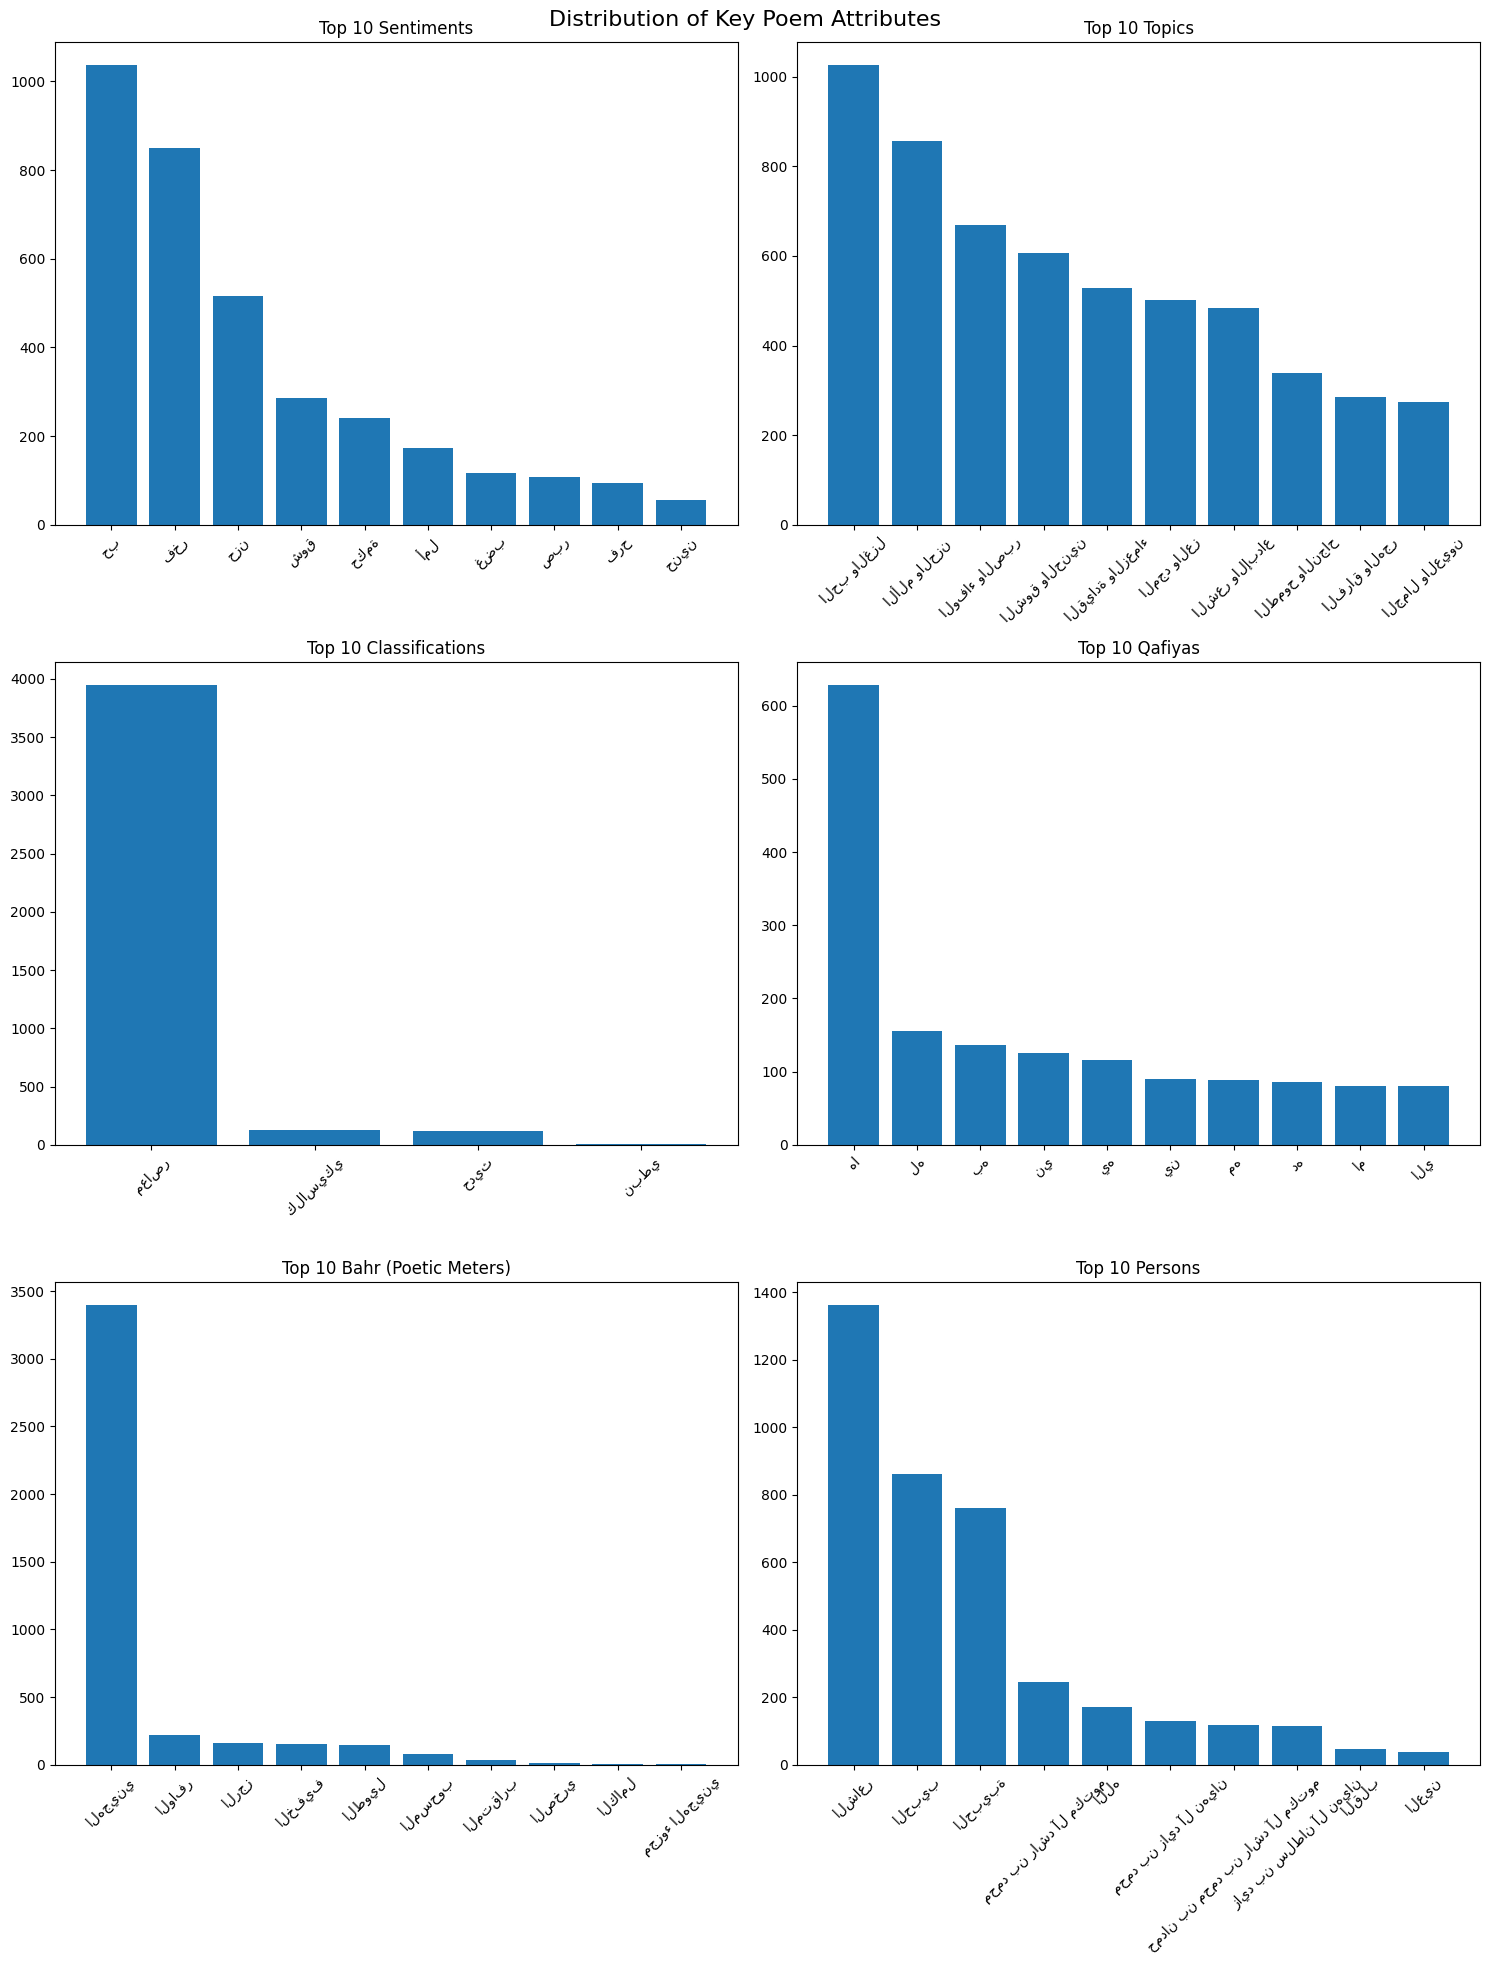


=== SUMMARY ===
Total poems: 4213
Unique poem IDs: 352
Unique Row IDs: 4213
sentiments: 14 unique values
أحداث: 23 unique values
دين: 10 unique values
مواضيع: 37 unique values
تصنيف: 4 unique values
قافية: 352 unique values
روي: 23 unique values
البحر: 10 unique values
وصل: 5 unique values
حركة: 4 unique values
Unique places: 614
Unique persons: 273

Comprehensive analysis completed. Results saved to:
- complete_poem_analysis_results.json
- comprehensive_poem_analysis_report.json


In [13]:
import pandas as pd
import json
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load your CSV file
df = pd.read_csv('./CSV/FAZ3_POEMS_Exact_Search - Exact_search.csv')

def analyze_column_values(df, column_name):
    """Analyze and return unique values and their counts for a specific column"""
    if column_name in df.columns:
        # Handle potential JSON in the column
        all_values = []
        for item in df[column_name].dropna():
            if pd.isna(item) or item == '[]':
                continue
            try:
                # Try parsing as JSON list
                parsed = json.loads(str(item))
                if isinstance(parsed, list):
                    all_values.extend(parsed)
                else:
                    all_values.append(str(item))
            except json.JSONDecodeError:
                # If not JSON, split comma-separated values
                if ',' in str(item):
                    values = [v.strip().strip('"').strip("'") for v in str(item).split(',')]
                    all_values.extend(values)
                else:
                    all_values.append(str(item))
        
        # Count occurrences
        value_counts = Counter(all_values)
        return dict(value_counts.most_common())
    return {}

# Analyze all important columns
important_cols = ['sentiments', 'أحداث', 'دين', 'مواضيع', 'تصنيف', 'قافية', 'روي', 'البحر', 'وصل', 'حركة']

# Create analysis results
analysis_results = {}
for col in important_cols:
    analysis_results[col] = analyze_column_values(df, col)

# Also analyze JSON-based columns ( places and persons )
def analyze_json_column(df, column_name, key_to_extract):
    """Analyze JSON columns for specific keys"""
    all_values = []
    for idx, row in df.iterrows():
        if pd.notna(row[column_name]) and row[column_name] != '[]':
            try:
                items_list = json.loads(row[column_name])
                if isinstance(items_list, list):
                    for item in items_list:
                        if key_to_extract in item:
                            all_values.append(item[key_to_extract])
            except json.JSONDecodeError:
                continue
    
    value_counts = Counter(all_values)
    return dict(value_counts.most_common())

# Analyze places and persons
places_results = analyze_json_column(df, 'أماكن', 'name')
persons_results = analyze_json_column(df, 'شخص', 'name')

# Print detailed results
print("=== DETAILED ANALYSIS RESULTS ===\n")

# Print all values for each column
for col, counts in analysis_results.items():
    print(f"\n{col} ({len(counts)} unique values):")
    for value, count in counts.items():
        print(f"  '{value}': {count}")

print(f"\nPlaces (names) ({len(places_results)} unique values):")
for value, count in places_results.items():
    print(f"  '{value}': {count}")

print(f"\nPersons (names) ({len(persons_results)} unique values):")
for value, count in persons_results.items():
    print(f"  '{value}': {count}")

# Create visualizations for top 10 of each category
fig, axes = plt.subplots(3, 2, figsize=(15, 20))
fig.suptitle('Distribution of Key Poem Attributes', fontsize=16)

# Plot 1: Top 10 Sentiments
top_10_sentiments = dict(list(analysis_results['sentiments'].items())[:10])
axes[0,0].bar(top_10_sentiments.keys(), top_10_sentiments.values())
axes[0,0].set_title('Top 10 Sentiments')
axes[0,0].tick_params(axis='x', rotation=45)

# Plot 2: Top 10 Topics
top_10_topics = dict(list(analysis_results['مواضيع'].items())[:10])
axes[0,1].bar(top_10_topics.keys(), top_10_topics.values())
axes[0,1].set_title('Top 10 Topics')
axes[0,1].tick_params(axis='x', rotation=45)

# Plot 3: Top 10 Classifications
top_10_classifications = dict(list(analysis_results['تصنيف'].items())[:10])
axes[1,0].bar(top_10_classifications.keys(), top_10_classifications.values())
axes[1,0].set_title('Top 10 Classifications')
axes[1,0].tick_params(axis='x', rotation=45)

# Plot 4: Top 10 Qafiyas (Rhymes)
top_10_qafiyas = dict(list(analysis_results['قافية'].items())[:10])
axes[1,1].bar(top_10_qafiyas.keys(), top_10_qafiyas.values())
axes[1,1].set_title('Top 10 Qafiyas')
axes[1,1].tick_params(axis='x', rotation=45)

# Plot 5: Top 10 Bahr (Poetic Meters)
top_10_bahr = dict(list(analysis_results['البحر'].items())[:10])
axes[2,0].bar(top_10_bahr.keys(), top_10_bahr.values())
axes[2,0].set_title('Top 10 Bahr (Poetic Meters)')
axes[2,0].tick_params(axis='x', rotation=45)

# Plot 6: Top 10 Persons
top_10_persons = dict(list(persons_results.items())[:10])
axes[2,1].bar(top_10_persons.keys(), top_10_persons.values())
axes[2,1].set_title('Top 10 Persons')
axes[2,1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Summary statistics
print(f"\n=== SUMMARY ===")
print(f"Total poems: {len(df)}")
print(f"Unique poem IDs: {df['poem_id'].nunique()}")
print(f"Unique Row IDs: {df['Row_ID'].nunique()}")

# Detailed summary for each column
for col in important_cols:
    print(f"{col}: {len(analysis_results[col])} unique values")

print(f"Unique places: {len(places_results)}")
print(f"Unique persons: {len(persons_results)}")

# Save complete results to JSON
with open('complete_poem_analysis_results.json', 'w', encoding='utf-8') as f:
    json.dump({
        'column_analysis': analysis_results,
        'places_analysis': places_results,
        'persons_analysis': persons_results
    }, f, ensure_ascii=False, indent=2)

# Create a comprehensive report
report = {
    "summary": {
        "total_poems": len(df),
        "unique_poem_ids": df['poem_id'].nunique(),
        "unique_row_ids": df['Row_ID'].nunique()
    },
    "detailed_analysis": {
        "sentiments": analysis_results['sentiments'],
        "events": analysis_results['أحداث'],
        "religion": analysis_results['دين'],
        "topics": analysis_results['مواضيع'],
        "classification": analysis_results['تصنيف'],
        "qafiya": analysis_results['قافية'],
        "rawi": analysis_results['روي'],
        "bahr": analysis_results['البحر'],
        "wasl": analysis_results['وصل'],
        "haraka": analysis_results['حركة'],
        "places": places_results,
        "persons": persons_results
    }
}

# Save comprehensive report
with open('comprehensive_poem_analysis_report.json', 'w', encoding='utf-8') as f:
    json.dump(report, f, ensure_ascii=False, indent=2)

print("\nComprehensive analysis completed. Results saved to:")
print("- complete_poem_analysis_results.json")
print("- comprehensive_poem_analysis_report.json")

In [15]:
import pandas as pd
import json
from collections import Counter

# Load your CSV file
df = pd.read_csv('./CSV/FAZ3_POEMS_Exact_Search - Exact_search.csv')

def analyze_column_values(df, column_name):
    """Analyze and return unique values and their counts for a specific column"""
    if column_name in df.columns:
        all_values = []
        for item in df[column_name].dropna():
            if pd.isna(item) or item == '[]':
                continue
            try:
                parsed = json.loads(str(item))
                if isinstance(parsed, list):
                    all_values.extend(parsed)
                else:
                    all_values.append(str(item))
            except json.JSONDecodeError:
                if ',' in str(item):
                    values = [v.strip().strip('"').strip("'") for v in str(item).split(',')]
                    all_values.extend(values)
                else:
                    all_values.append(str(item))
        
        value_counts = Counter(all_values)
        return dict(value_counts.most_common())
    return {}

# Analyze all important columns
important_cols = ['sentiments', 'أحداث', 'دين', 'مواضيع', 'تصنيف', 'قافية', 'روي', 'البحر', 'وصل', 'حركة']

# Create analysis results
analysis_results = {}
for col in important_cols:
    analysis_results[col] = analyze_column_values(df, col)

# Analyze JSON-based columns
def analyze_json_column(df, column_name, key_to_extract):
    all_values = []
    for idx, row in df.iterrows():
        if pd.notna(row[column_name]) and row[column_name] != '[]':
            try:
                items_list = json.loads(row[column_name])
                if isinstance(items_list, list):
                    for item in items_list:
                        if key_to_extract in item:
                            all_values.append(item[key_to_extract])
            except json.JSONDecodeError:
                continue
    
    value_counts = Counter(all_values)
    return dict(value_counts.most_common())

# Analyze places and persons
places_results = analyze_json_column(df, 'أماكن', 'name')
persons_results = analyze_json_column(df, 'شخص', 'name')

# Create unified report
report = {
    "summary": {
        "total_poems": len(df),
        "unique_poem_ids": df['poem_id'].nunique(),
        "unique_row_ids": df['Row_ID'].nunique(),
        "column_statistics": {col: len(analysis_results[col]) for col in important_cols},
        "places_unique_count": len(places_results),
        "persons_unique_count": len(persons_results)
    },
    "detailed_analysis": {
        "sentiments": analysis_results['sentiments'],
        "events": analysis_results['أحداث'],
        "religion": analysis_results['دين'],
        "topics": analysis_results['مواضيع'],
        "classification": analysis_results['تصنيف'],
        "qafiya": analysis_results['قافية'],
        "rawi": analysis_results['روي'],
        "bahr": analysis_results['البحر'],
        "wasl": analysis_results['وصل'],
        "haraka": analysis_results['حركة'],
        "places": places_results,
        "persons": persons_results
    }
}

# Save unified report
with open('poem_analysis_report.json', 'w', encoding='utf-8') as f:
    json.dump(report, f, ensure_ascii=False, indent=2)

print("Analysis complete. Results saved to 'poem_analysis_report.json'")
print(f"Total poems analyzed: {len(df)}")
print(f"Unique poem IDs: {df['poem_id'].nunique()}")

Analysis complete. Results saved to 'poem_analysis_report.json'
Total poems analyzed: 4213
Unique poem IDs: 352


In [10]:
import pandas as pd

input_file = ".\CSV\FAZ3_POEMS_Exact_Search - Exact_search.csv"
output_file = ".\CSV\FAZ3_POEMS_Exact_Search - Exact_search_fixed.csv"

# Load CSV
df = pd.read_csv(input_file)

# Preview original 'مواضيع' column
print("Original 'مواضيع' column:")
print(df['مواضيع'].head(), "\n")

# Clean 'مواضيع' column
def clean_topics(col):
    if pd.isna(col):
        return col
    col = col.strip('"')        # Remove all surrounding quotes
    if ',' in col:
        col = f'"{col}"'        # Wrap in single pair of quotes if comma exists
    return col

df['مواضيع'] = df['مواضيع'].apply(clean_topics)

# Preview cleaned column
print("Cleaned 'مواضيع' column:")
print(df['مواضيع'].head(), "\n")

# Save cleaned CSV
df.to_csv(output_file, index=False, encoding='utf-8')
print(f"Cleaned CSV saved to {output_file}")


Original 'مواضيع' column:
0    "الحب والغزل, الغيرة والعتاب"
1      "الحب والغزل, الألم والحزن"
2     "الحب والغزل, الشوق والحنين"
3    "الألم والحزن, الشوق والحنين"
4     "الحب والغزل, الشوق والحنين"
Name: مواضيع, dtype: object 

Cleaned 'مواضيع' column:
0    "الحب والغزل, الغيرة والعتاب"
1      "الحب والغزل, الألم والحزن"
2     "الحب والغزل, الشوق والحنين"
3    "الألم والحزن, الشوق والحنين"
4     "الحب والغزل, الشوق والحنين"
Name: مواضيع, dtype: object 

Cleaned CSV saved to .\CSV\FAZ3_POEMS_Exact_Search - Exact_search_fixed.csv


In [13]:
import pandas as pd

# Read CSV
df = pd.read_csv(r".\CSV\FAZ3_POEMS_Exact_Search - Exact_search.csv")

# Function to convert a cell to Postgres array
def to_pg_array(cell):
    if pd.isna(cell) or cell.strip() == '':
        return '{}'  # empty array
    # Remove extra quotes, split by comma, wrap each in double quotes
    items = [i.strip() for i in cell.strip('"').split(',')]
    return '{' + ','.join(f'"{i}"' for i in items) + '}'

# Apply conversion
df['مواضيع'] = df['مواضيع'].apply(to_pg_array)

# Check output
print(df['مواضيع'].head())

# Save fixed CSV
df.to_csv(r".\CSV\FAZ3_POEMS_Exact_Search_fixed.csv", index=False)


0    {"الحب والغزل","الغيرة والعتاب"}
1      {"الحب والغزل","الألم والحزن"}
2     {"الحب والغزل","الشوق والحنين"}
3    {"الألم والحزن","الشوق والحنين"}
4     {"الحب والغزل","الشوق والحنين"}
Name: مواضيع, dtype: object
